# Gender Classification
Train a simple gender classification model.
The model will guess either male or female by the given 88 GeMAPS features.

In [21]:
# Imports
# Python packages
import os
import numpy as np
import matplotlib.pyplot as plt
# Logic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# play audio
import IPython.display as ipd

# Custom package
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / "src"))
from age_by_voice.dataset_prep.dataset_preparator import Dataset_Perparator

In [22]:
voices_path = "/home/chr1s/Dokumente/github/Programming/Python/Age_by_Voice/data/csv_saves/save_voices_5000.csv"
features_path = "/home/chr1s/Dokumente/github/Programming/Python/Age_by_Voice/data/csv_saves/save_features_5000.csv"
audio_path = "/home/chr1s/Downloads/cv-corpus-21.0-2025-03-14/en/clips/"

In [20]:
data_prep = Dataset_Perparator(voices_path, features_path)

In [32]:
# play random audio file
file = data_prep.voices.audio_file_name.sample(1).values[0]
file_path = os.path.join(audio_path, file)

ipd.Audio(file_path)  # Play the audio file

<Axes: xlabel='voice_gender'>

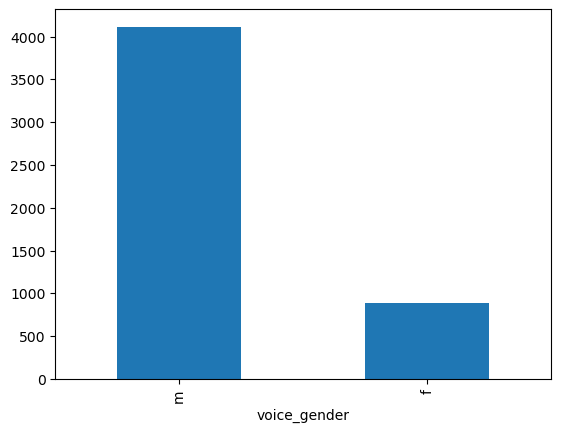

In [4]:
# plot the gender count
data_prep.voices.voice_gender.value_counts().plot(kind='bar')

In [37]:
X_train, X_test, y_train, y_test = data_prep.prepare_gender_dataset(test_size=0.001)
y_train = y_train["male"]
y_test = y_test["male"]

In [38]:
# Verify if clip_id is unique in voices and features
print("Voices clip_id unique:", data_prep.voices['clip_id'].is_unique)
print("Features clip_id unique:", data_prep.features['clip_id'].is_unique)

Voices clip_id unique: True
Features clip_id unique: True


<Axes: xlabel='male'>

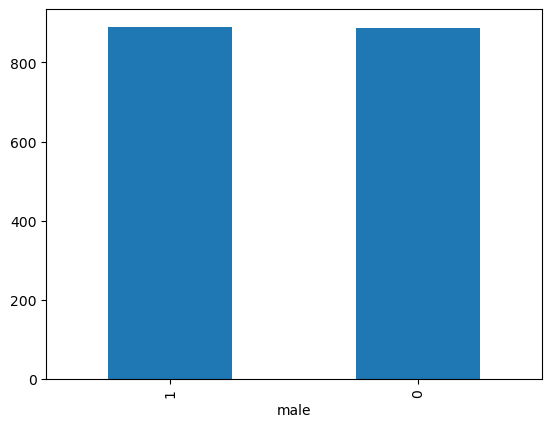

In [39]:
# plot the gender count for X_train (two columns, one of them is 1 per row)
y_train.value_counts().plot(kind='bar')


In [40]:
model = LogisticRegression(max_iter=9000)

In [41]:
model.fit(X_train, y_train)
print("Model score:", model.score(X_test, y_test))
y_pred_proba = model.predict_proba(X_test)
print("Predicted probabilities for male and female:", y_pred_proba)

Model score: 0.5
Predicted probabilities for male and female: [[0.46602415 0.53397585]
 [0.54164721 0.45835279]]


/home/chr1s/.conda/envs/age_by_voice/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
X_train

,F0semitoneFrom27_5Hz_sma3nz_amean,F0semitoneFrom27_5Hz_sma3nz_stddevNorm,F0semitoneFrom27_5Hz_sma3nz_percentile20_0,F0semitoneFrom27_5Hz_sma3nz_percentile50_0,F0semitoneFrom27_5Hz_sma3nz_percentile80_0,F0semitoneFrom27_5Hz_sma3nz_pctlrange0_2,F0semitoneFrom27_5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27_5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27_5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27_5Hz_sma3nz_stddevFallingSlope,...,slopeUV0_500_sma3nz_amean,slopeUV500_1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.144174,1.939058,1.685393,0.250000,0.220907,0.275714,0.329842,-21.407711
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.125045,3.852080,2.959502,0.278947,0.300839,0.056667,0.033250,-32.082893
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.106132,3.676471,4.528302,0.093333,0.076085,0.126000,0.203627,-34.823044
1767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.193743,4.018912,3.588517,0.109333,0.081606,0.148000,0.143118,-25.124146
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.126322,1.909308,2.905569,0.235000,0.354812,0.073571,0.064543,-29.580614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.202192,2.127660,0.956938,0.450000,0.326573,0.376667,0.470520,-22.363949
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.910370,3.716814,3.231598,0.232778,0.178070,0.063750,0.033143,-19.873201
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.078079,3.017833,2.624310,0.134211,0.129871,0.213000,0.207487,-26.696703
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.200136,3.061225,2.790015,0.223158,0.203057,0.142000,0.159675,-19.250626
